In [17]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [6]:
lymedisease = pd.read_csv('LD-Case-Counts-by-County-00-19.csv', encoding='latin')

In [7]:
lymedisease.head()

,Ctyname,Stname,STCODE,CTYCODE,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,...,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
0,Autauga County,Alabama,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
1,Baldwin County,Alabama,1,3,1,0,1,0,0,0,...,0,1,1,0,3,1,2,2,0,0
2,Barbour County,Alabama,1,5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Bibb County,Alabama,1,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Blount County,Alabama,1,9,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0


In [8]:
states_and_counties = gpd.read_file('../../processed-spatial/general/counties_and_states.json')

In [9]:
states_and_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,STUSPS,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,KY,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,KY,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,KY,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,KY,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,KY,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [11]:
states_and_counties['STCODE'] = states_and_counties['STATEFP'].astype(int)

In [12]:
lymedisease['STCODE'].unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [19]:
np.sort(states_and_counties['STCODE'].unique())

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56,
       60, 66, 69, 72, 78])

In [20]:
def get_cname(x):
    x = x.replace(' County', '')
    return x

lymedisease['CNAME'] = lymedisease['Ctyname'].apply(get_cname)

In [21]:
merged = states_and_counties.merge(lymedisease, left_on=['STCODE', 'NAME'], right_on=['STCODE', 'CNAME'])

In [23]:
merged.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,STUSPS,...,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019,CNAME
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,KY,...,0,0,0,0,0,0,1,0,0,Ballard
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,KY,...,0,0,0,0,0,0,0,0,0,Bourbon
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,KY,...,0,0,0,0,0,0,0,0,0,Butler
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,KY,...,0,0,0,0,1,0,0,0,0,Estill
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,KY,...,0,0,0,0,0,0,0,0,0,Fleming


In [24]:
merged.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'STUSPS', 'geometry', 'STCODE', 'Ctyname', 'Stname',
       'CTYCODE', 'Cases2000', 'Cases2001', 'Cases2002', 'Cases2003',
       'Cases2004', 'Cases2005', 'Cases2006', 'Cases2007', 'Cases2008',
       'Cases2009', 'Cases2010', 'Cases2011', 'Cases2012', 'Cases2013',
       'Cases2014', 'Cases2015', 'Cases2016', 'Cases2017', 'Cases2018',
       'Cases2019', 'CNAME'],
      dtype='object')

In [25]:
lymedis_counties = merged[['STATEFP', 'NAME', 'STUSPS', 'geometry', 'STCODE', 'Cases2000', 'Cases2001', 'Cases2002', 'Cases2003',
       'Cases2004', 'Cases2005', 'Cases2006', 'Cases2007', 'Cases2008',
       'Cases2009', 'Cases2010', 'Cases2011', 'Cases2012', 'Cases2013',
       'Cases2014', 'Cases2015', 'Cases2016', 'Cases2017', 'Cases2018',
       'Cases2019', 'CNAME']]

In [26]:
lymedis_counties.to_file('lymedisease_counties_ts.json', driver='GeoJSON')

/Users/szymonos/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [27]:
# AGG

In [29]:
lymedis_counties.head()

,STATEFP,NAME,STUSPS,geometry,STCODE,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,...,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019,CNAME
0,21,Ballard,KY,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",21,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Ballard
1,21,Bourbon,KY,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bourbon
2,21,Butler,KY,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",21,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Butler
3,21,Estill,KY,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",21,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,Estill
4,21,Fleming,KY,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fleming


In [32]:
lymedis = lymedis_counties.drop(['geometry', 'NAME', 'CNAME', 'STATEFP', 'STCODE'], axis=1)

In [33]:
lymedis.head()

,STUSPS,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,Cases2006,Cases2007,Cases2008,...,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
0,KY,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,KY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,KY,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,KY,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,KY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
aggregated = lymedis.groupby('STUSPS').sum()

In [35]:
aggregated.head()

,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,Cases2006,Cases2007,Cases2008,Cases2009,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
STUSPS,,,,,,,,,,,,,,,,,,,,
AL,6,10,11,8,6,3,11,12,9,3,2,24,25,24,64,25,38,40,36,66
AR,7,4,3,0,0,0,0,1,0,0,0,0,0,0,0,0,2,6,4,18
AZ,2,3,4,4,13,10,10,2,8,7,2,15,13,32,21,12,13,28,7,10
CA,96,95,97,86,48,95,85,75,74,117,129,92,70,112,73,98,134,145,104,144
CO,0,0,1,0,0,0,0,0,3,1,3,0,0,0,0,0,0,4,3,8


In [36]:
states = gpd.read_file('../spatial/us-states/cb_2018_us_state_500k.shp')

In [37]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [38]:
states = states[['geometry', 'NAME', 'STUSPS']]

In [39]:
aggre = aggregated.reset_index()

In [40]:
merged = states.merge(aggre, on='STUSPS')

In [41]:
merged.head()

,geometry,NAME,STUSPS,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,Cases2006,...,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
0,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Mississippi,MS,3,8,12,21,0,0,3,...,0,5,1,0,2,4,1,1,4,4
1,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina,NC,47,41,137,156,122,49,31,...,82,88,122,180,170,230,272,295,212,334
2,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",Oklahoma,OK,1,0,0,0,3,0,0,...,0,2,4,3,0,0,0,1,0,0
3,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia,VA,156,182,292,175,191,259,422,...,1149,959,1142,1350,1442,1474,1353,1467,1079,1076
4,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",West Virginia,WV,35,16,26,31,38,61,28,...,145,114,93,137,135,164,231,577,523,629


<AxesSubplot:>

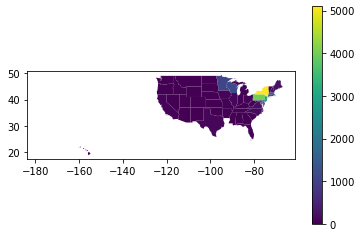

In [42]:
merged.plot(column='Cases2004', legend=True)

In [43]:
merged.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [44]:
merged.to_file('lymedisease_states_ts.json', driver='GeoJSON')

/Users/szymonos/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
